# Cyfrowe Przetwarzanie Sygnałów

**Laboratorium nr 1 Próbkowanie sygnałów**

prof. dr hab. inż. Tomasz Zieliński, dr inż. Jarosław Bułat

matlab->python: Krzysztof Stefański

---

## **1. Próbkowanie sygnałów analogowych (2+0.5 pkt)**

Przyjmijmy, że funkcja `np.sin(...)` ze środowiska Python jest funkcją ciągłą, tj. możemy ją spróbkować w dowolnym miejscu w dziedzinie czasu.


<a name="anchor-2"></a>
**A.** Wygeneruj $0.1$ sekundy sinusoidy o amplitudzie $A=230V$ i częstotliwości $f=50Hz$ (napięcie sieci energetycznej) stosując częstotliwość próbkowania:

  1. $f_{s1}=10 kHz$ (pseudo analog) (niebieska linia ciągła 'b-')
  2. $f_{s2}=500Hz$ (czerwone kółko 'r-o')
  3. $f_{s3}=200Hz$ (czarny krzyżyk 'k-x')

Wyświetl wszystkie przebiegi na jednym wykresie z wyskalowaniem osi czasu w sekundach [s].

**B.** Następnie wygeneruj 1 sekundę sinusoidy f=50 Hz, próbkując:

  1. $f_{s1}=10kHz$ (pseudo analog) ('b-')
  2. $f_{s2}=51Hz$ ('g-o')
  3. $f_{s3}=50Hz$ ('r-o')
  4. $f_{s4}=49Hz$ ('k-o')

Wyświetl te cztery sygnały na jednym wykresie z zachowaniem skali osi czasu w sekundach [$s$]. Powtórz ostatni rysunek dla $f_{sx}=26$, $25$, $24 Hz$, zamiast $51$, $50$, $49 Hz$ .


**C.** Przyjmij $f_s=100Hz$. W pętli generuj i wyświetlaj (wyskaluj oś czasu) $1$ sekundę sinusoidy, zmieniając jej częstotliwość od $0Hz$  co $5Hz$  do $300Hz$  (61 obiegów pętli, wyświetlaj numer obiegu i zadaną wartość częstotliwości). Potem na jednym wykresie porównaj ze sobą sinusoidy o częstotliwościach $5Hz$ , $105Hz$ i $205Hz$ , następnie $95$, $195$ i $295Hz$, a na końcu $95Hz$ i $105Hz$. Powtórz ten eksperyment dla kosinusoidy zamiast sinusoidy.


**D.** (opcjonalnie +0.5 pkt) Wygeneruj $1$ sekundę sygnału sinusoidalnego z sinusoidalną modulacją częstotliwości SFM (częstotliwość próbkowania $f_s=10 kHz$, częstotliwość nośna $f_n=50 Hz$, częstotliwość modulująca $f_m=1 Hz$, głębokość modulacji $d_f=5 Hz$). Następnie:
1. Wyświetl sygnał zmodulowany oraz modulujący na jednym wykresie.
2. Spróbkuj ($f_s=25 Hz$) sygnał zmodulowany. Porównaj go z sygnałem ,,analogowym'' na jednym wykresie. Narysuj w osi czasu błędy spowodowane próbkowaniem.
3. Wygeneruj i wyświetl widma gęstości mocy sygnału przed próbkowaniem i po próbkowaniu. Użyj funkcji `plt.magnitude_spectrum(...)`.



---



In [1]:
# Rozwiązanie
import numpy as np
import matplotlib.pyplot as plt

print("1", 2)

# ....

1 2


## **2. Rekonstrukcja sygnału analogowego (2 pkt)**

Wykonaj rekonstrukcję sygnału z punktu <a>[1.A](#anchor-2)</a> za pomocą splotu z funkcją $sin(x)/x$. Sygnał spróbkowany $f_{s3}=200 Hz$ odtwórz w chwilach czasowych odpowiadających częstotliwości próbkowania $f_s=10 kHz$. Porównaj zrekonstruowany sygnał i ,,pseudo analogowy'' (różnymi kolorami na jednym wykresie). Wyświetl błędy rekonstrukcji.

> Uwaga! Podobny przykład był na przedmiocie TOwNiT.

Ilustrację graficzną rekonstrukcji za pomocą splotu z sygnałem $sin(x)/x$ przedstawiono na rysunku 2.1. Oryginalny sygnał zaznaczono niebieskim kolorem, jest on zdefiniowany tylko w chwili $t=0, 0.1, 0.2, …, 0.9$. Sygnał zrekonstruowany przedstawiono zielonym kolorem. Rekonstrukcję sygnału wykonano dla $t=0, 0.01, 0.02, …, 0.1, ..., 0.9$ a więc odtwarzając sygnał dla częstotliwości próbkowania pięć razy większej niż w sygnale wejściowym. Poprawnie spróbkowany sygnał wejściowy można odtworzyć w dowolnej chwili $t$.

Na rysunkach przedstawiono jakie operacje należy wykonać aby uzyskać dwie próbki sygnału wynikowego, w chwili $t=0.3$ (górny rysunek) i $t=0.34$ (dolny rysunek). Należy zwrócić uwagę, że jest to operacja splotu oraz na przesunięcie sygnału $sin(x)/x$ względem sygnału wejściowego.


<center>
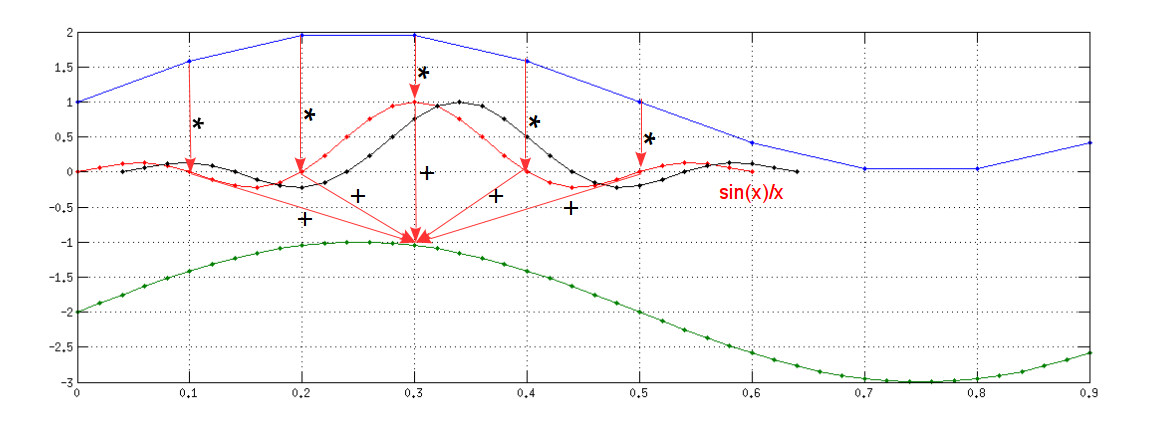



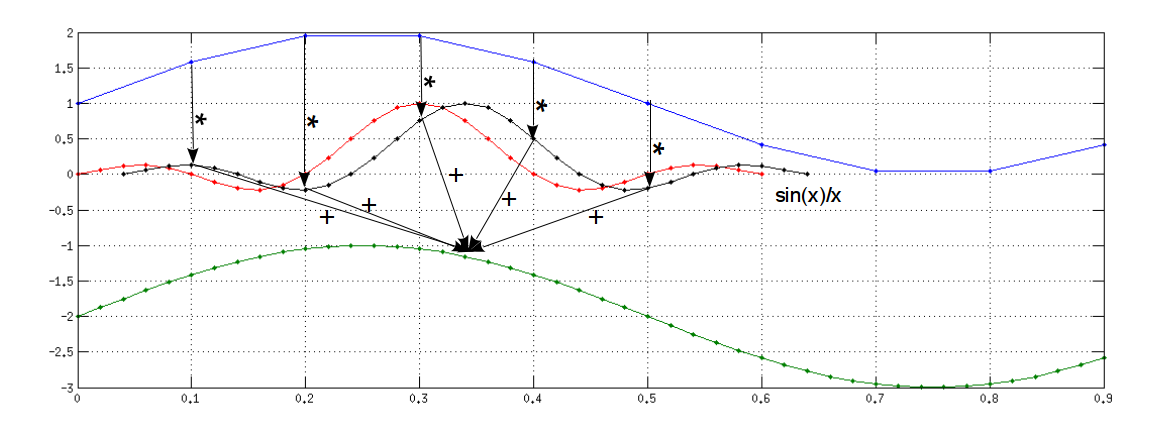
<h4><b>Rys 2.1.</b> Rekonstrukcja sygnału za pomocą splotu z sygnałem <i>sin(x)/x</i></h4></center>

Dla przypomnienia: niech $x(t)$ będzie sygnałem analogowym, natomiast $x(nT)$ - sygnałem $x(t)$ po operacji próbkowania w dziedzinie czasu (niebieskie kropki na Rys 2.1) w chwilach $t=nT$, gdzie $T=1/f_{pr}$ oznacza okres próbkowania, a n numer próbki. Rekonstrukcję sygnału analogowego (zielone kropki na Rys 2.1) przeprowadza się na podstawie wzoru:
<br /><br />
$$x(t)=\sum_{n=−∞}^∞\frac{sin(\frac{π}{T}(t-nT))}{\frac{π}{T}(t-nT)}=\sum_{n=−∞}^∞x(nT)sinc(\frac{π}{T}(t-nT))$$
gdzie:
$$sinc(y)=\left\{\frac{sin(y)}{y} \quad dla\quad y≠0,\quad 1\quad dla\quad y=0\right.$$
<br />
Kod programu powinien wyglądać mniej więcej tak jak poniżej:

---

In [ ]:
import numpy as np

ts = np.arange(0, 1, 0.02) # wektor wszystkich miejsc (t) w których chcemy odtworzyć sygnał
xhat = np.zeros(len(ts))

for idx in range(len(ts)):
  t = ts[idx]
  xhat[idx] = 0
  for n in range(-3, 3): # zakres sinc()
    xhat[idx] = xhat[idx] + … # we wzorze należy wykorzystać „n” i „t”

## **3. Korelacja sygnałów (1+0.5 pkt)**
Wyszukiwanie prefiksu w sygnale czasowym odbiornika ADSL. Dostarczony sygnał zaprezentowany na rysunku 3.1 ma następującą strukturę: $K=4$ razy po ($M+N$) - próbek, gdzie początkowych $M=32$ próbek (tzw. prefiks) stanowi powtórzenie ostatnich $M$ próbek każdego bloku $N=512$ próbek.


<center>
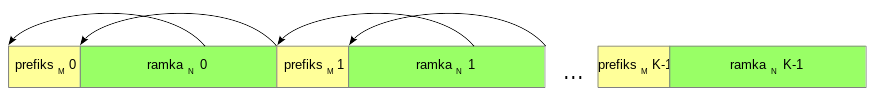
<h4><b>Rys 3.1.</b> Fragment struktury sygnału ADSL</h4></center>

Wczytaj sygnał w pliku `adsl_x.mat`, wyznacz początek pierwszej próbki każdego prefiksu. Używaj funkcji `np.correlate(x, y, mode='full')` Matlaba.

> (**Opcjonalnie +0.5 pkt**) napisz własną funkcję obliczającą korelację wzajemną.
---

In [ ]:
import gdown

# URL pliku do pobrania
url = 'https://drive.google.com/uc?id=1DlFH_fB-T39E7ha00sGnWmcipyBAua3F'

# Ścieżka, pod którą chcesz zapisać pobrany plik
output_path = 'adsl_x.mat'

# Pobieranie pliku
gdown.download(url, output_path, quiet=False)

In [ ]:
# Rozwiązanie
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

data = scipy.io.loadmat('adsl_x.mat')
x = np.array(data['x'])
prefix_len = 32  # długość prefiksu
frame_len = 512  # długość ramki
package_len = prefix_len + frame_len # długość ramki i prefiksu

# ...

## **4. Sygnały rzeczywiste (opcjonalne, dla dociekliwych, +1 pkt)**

Synchronizacja w DAB z wykorzystaniem NullSymbol oraz PhaseReference Symbol.

Dostarczony w plikach `DAB_real_2.048MHz_IQ_float.dat` i `DAB_synt_2.048MHz_IQ_float.dat` sygnał DAB składa się z okresowo powtarzających się sekwencji próbek zespolonych (w części rzeczywistej
I - in phase, w części urojonej Q - in quadrature) o strukturze zaprezentowanej na rysunku 4.1. Sekwencja składa się z: $2656$ zer (NullSymbol) oraz $76$ bloków po $2552$ próbki (pierwsze $504$ powtarzają się na końcu - jest to tzw. prefiks).

<center>
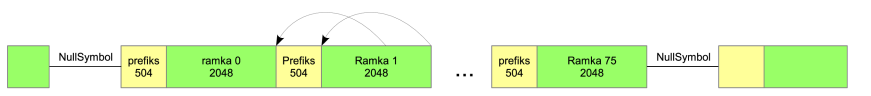
<h4><b>Rys 4.1.</b> Struktura sygnału DAB</h4></center>
<br />

Pierwszy z $76$ bloków danych jest znany, to tzw. PhaseReference: wykorzystaj funkcję `phaseRefSymbGen(...)` do wygenerowania sygnału `sigPhaseRefSymb`, który jest wektorem liczb zespolonych. Z powodu pracy przetwornika AC w odbiorniku na innej częstotliwości próbkowania niż założona<sup>[1](#anchor-1)</sup> , liczba próbek poszczególnych bloków w sygnale rzeczywistym może się nieznacznie różnić. Znając sygnał sigPhaseRefSymb znajdź miejsca jego występowania w dostarczonych, czystych oraz zniekształconych/zaszumionych sygnałach metodą korelacji wzajemnej (funkcja `np.correlate(...)` numpy). Wyznacz początek sekwencji $76$ bloków, wykorzystując fakt, że energia bloku
NullSymbol (w rzeczywistości szum kanału lub dodatkowego słabego sygnału informacyjnego) jest zdecydowanie mniejsza niż energia próbek występujących po nim. Na końcu za pomocą funkcji korelacji sprawdź, że pierwsze i ostatnie $504$ próbki kolejnych $76$ bloków są „identyczne” („podobne”: dobrze ze sobą skorelowane). Działanie swoich programów przetestuj na sygnale „czystym”(nadawanym) oraz „brudnym” /zaszumionym (odbieranym).

Przykładowy program wczytujący sekwencję sygnału DAB został zamieszczony poniżej.

> 1. <a name="anchor-1"></a>Jest to skutek niezamierzony spowodowany niemożnością synchronizacji próbkowania przetworników: C/A w nadajniku i A/C w odbiorniku. Odtworzenie w odbiorniku, częstotliwości pracy przetwornika nadajnika jest jednym z trudniejszych problemów, które trzeba rozwiązać w praktyce.
---

In [ ]:
import gdown
files_ids = [
    '1jNNp7mEztuSHJbzhqET6ciMWH3owZgSz',
    '1PJBC-QcRSZb0hKV9YmPYQFLUnUej-HvI',
    '1F0fhqtT2O0669rm3FbIR02ju3bCxOhIY',
    '1V3pD65aDlxot-776BHPO2CGMPrZ4sdGH']
files_names = [
    'DAB_real_2.048MHz_IQ_float.dat',
    'DAB_synt_2.048MHz_IQ_float.dat',
    # Orginalne pliki z kodem napisanym w Matlabie
    'DAB_read.m',
    'PhaseRefSymbGen.m',]

for id, name in zip(files_ids, files_names):
  gdown.download(f'https://drive.google.com/uc?id={id}', name, quiet=False)


In [ ]:
# Rozwiązanie 4 - sygnał bez szumu 'DAB_synt_2.048MHz_IQ_float.dat'
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import resample

# Odczytywanie sygnał IQ
iq = np.fromfile('DAB_synt_2.048MHz_IQ_float.dat', dtype=np.float32)
x = iq[::2] + 1j * iq[1::2]  # Połączeni3 części rzeczywistej i urojoną
x = np.reshape(x, (-1, 1))  # Zmina kształtu wektoru

x = resample(x, int(x.shape[0]))  # resampling sygnału

# ...

In [ ]:
# Rozwiązanie 4 - sygnał z szumu 'DAB_real_2.048MHz_IQ_float.dat'
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.signal import resample, butter, filtfilt

# Odczytywanie sygnał IQ
iq = np.fromfile('DAB_real_2.048MHz_IQ_float.dat', dtype=np.float32)
x = iq[::2] + 1j * iq[1::2]  # Połączeni3 części rzeczywistej i urojoną
x = np.reshape(x, (-1, 1))  # Zmina kształtu wektoru

x = resample(x, int(x.shape[0]))  # resampling sygnału

# ...

# Oznaczenia - dotyczy wszystkich konspektów
W instrukcjach bardzo często będzie mieszany kod źródłowy w językach Matlab lub C/C++, Pythona oraz wzory matematyczne. Będą one zapisane w różny sposób aby uniknąć pomyłek. Poniżej przykłady:

**Kod źródłowy w postaci ramki** (czarne tło)



In [ ]:
import numpy as np

w1 = np.array([0, 0, 1, 0, 0, 0, 0, 0])  # Wektor 1
w2 = np.array([0, 0, 0, 0, 1, 0, 0, 0])  # Wektor 2

w12 = w1 * w2  # Iloczyn odpowiadających sobie próbek
prod1 = np.sum(w12)  # "0" oznacza że wektory są ortogonalne
prod2 = np.dot(w1, w2)  # w przestrzeni Euklidesowej
prod3 = np.matmul(w1, np.transpose(w2))  # bezpośrednie obliczenie (mnożenie wektorowe)

print(prod1, prod2, prod3)

: 

**Kod źródłowy w tekście.** Dotyczy np. nazwy zmiennej, funkcji, nazwy pliku, ścieżki dostępu, etc... (czarne tło, biały tekst):
Tekst zawierający przykładowe wywołanie funkcji `sin( 2*pi*t*f+phi )` w języku Matlab. Nazwy zmiennych nie zawierają indeksów, np. częstotliwość próbkowania będzie zapisana jako  `fs`.

**Wzór** (wycentrowany, czcionka szeryfowa - Times New Roman, kursywa, tło białe):
<br /><br />
$$w_k(n)=s_k * cos\left(\frac{π*k}{N}*(n+0.5)\right)$$
<br />

**Wzór w tekście**:
Tekst opisujący powyższy wzór, gdzie $N=128$, $k=8$.

**Uwaga!** We wzorach mogą wstąpić indeksy, np. częstotliwość próbkowania będzie oznaczona jako $f_s$.

Zmienne są pisane kursywą np.: $N$, $k$, $x$, $f$, $t$

Macierze i wektory to litery, proste, pogrubione np. : <b>$A$, $n$, $v$</b>